In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing # The "Forecaster"
import warnings
warnings.filterwarnings('ignore')

# Set visual style
plt.style.use('fivethirtyeight')

# Create the dataset

In [ ]:
# Create a date range for 3 years
dates = pd.date_range(start='2023-01-01', end='2025-12-31', freq='M')

# Simulate sales: Base + Trend + Seasonality + Random Noise
np.random.seed(42)
sales_data = 100 + (np.arange(len(dates)) * 2) + (np.sin(np.arange(len(dates)) * (2 * np.pi / 12)) * 20) + np.random.normal(0, 5, len(dates))

df = pd.DataFrame({'Date': dates, 'Sales': sales_data})
df.set_index('Date', inplace=True)

print(df.head())

                 Sales
Date                  
2023-01-31  102.483571
2023-02-28  111.308678
2023-03-31  124.558951
2023-04-30  133.615149
2023-05-31  124.149741


# Plot the History

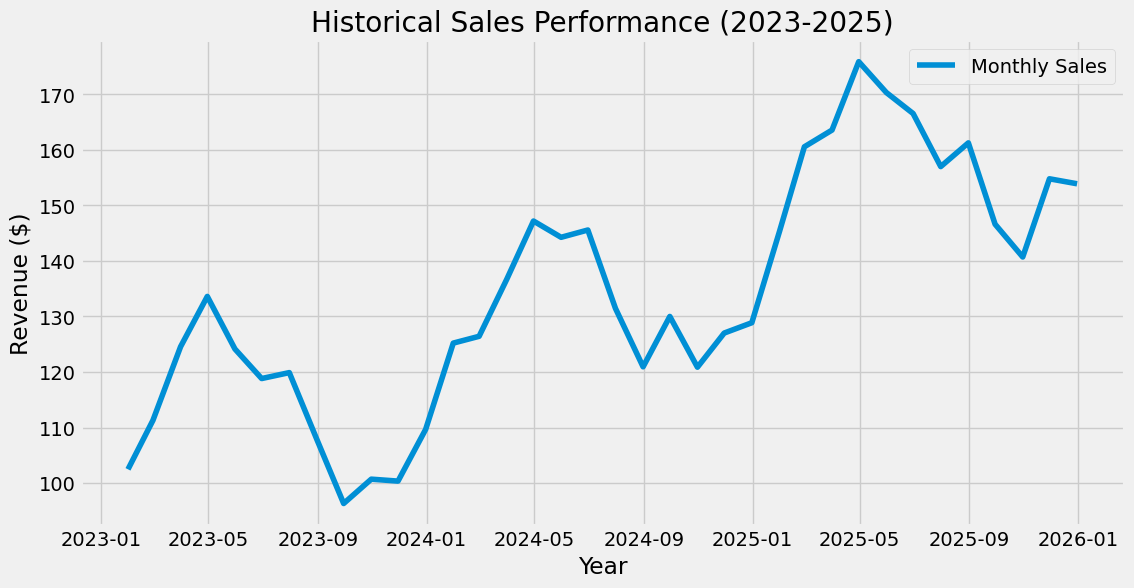

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Monthly Sales')
plt.title('Historical Sales Performance (2023-2025)')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()

# Train the Model

In [ ]:
# using the last 36 months to predict the next 6
model = ExponentialSmoothing(df['Sales'],
                             trend='add',
                             seasonal='add',
                             seasonal_periods=12).fit()

# Forecast for the next 6 months
forecast = model.forecast(6)
print(forecast)

2026-01-31    172.044802
2026-02-28    180.863219
2026-03-31    190.060658
2026-04-30    201.017411
2026-05-31    195.347293
2026-06-30    193.049522
Freq: ME, dtype: float64


# Visualising the future

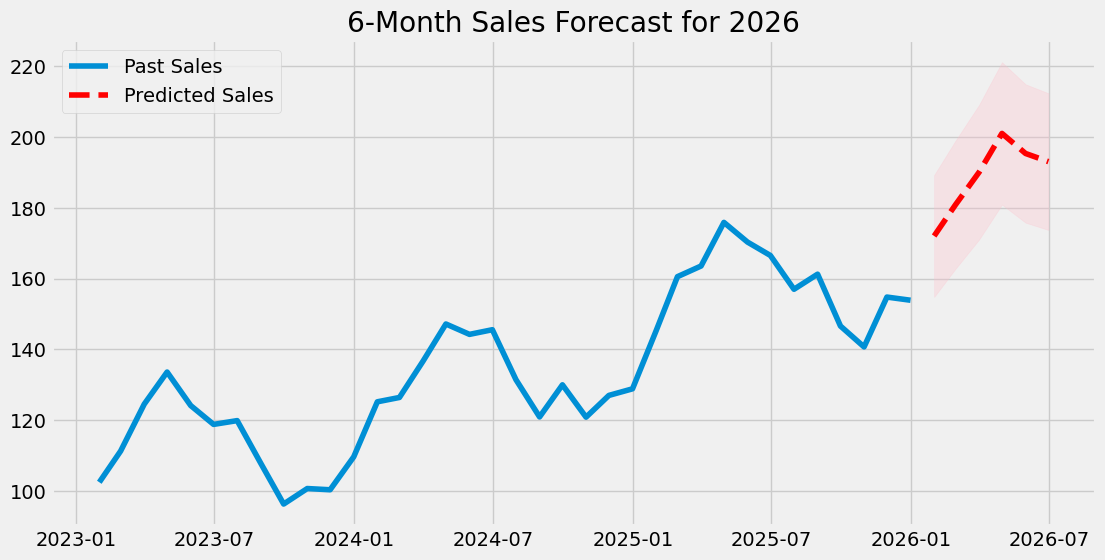

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Past Sales')
plt.plot(forecast.index, forecast, label='Predicted Sales', color='red', linestyle='--')
plt.title('6-Month Sales Forecast for 2026')
plt.fill_between(forecast.index, forecast*0.9, forecast*1.1, color='pink', alpha=0.3) # Confidence interval
plt.legend()

# Outlier Detection

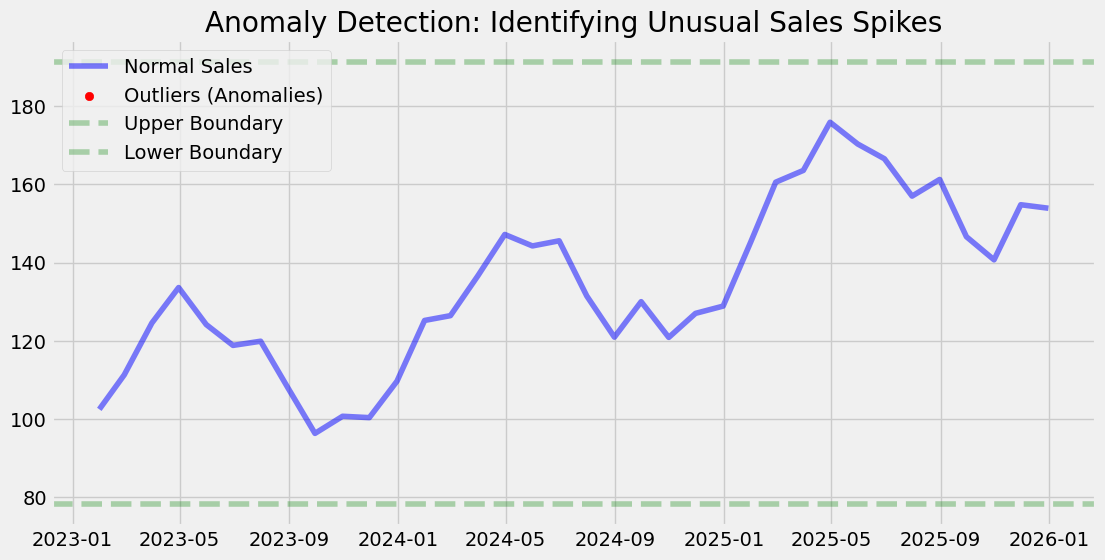

Number of anomalies detected: 0


In [ ]:
# 1. Calculate the 'Normal' range using IQR
Q1 = df['Sales'].quantile(0.25) # 25th percentile
Q3 = df['Sales'].quantile(0.75) # 75th percentile
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Identify the Outliers
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

# 3. Visualize Outliers on the Graph
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Normal Sales', color='blue', alpha=0.5)
plt.scatter(outliers.index, outliers['Sales'], color='red', label='Outliers (Anomalies)', zorder=5)
plt.axhline(upper_bound, color='green', linestyle='--', alpha=0.3, label='Upper Boundary')
plt.axhline(lower_bound, color='green', linestyle='--', alpha=0.3, label='Lower Boundary')

plt.title('Anomaly Detection: Identifying Unusual Sales Spikes')
plt.legend()
plt.show()

print(f"Number of anomalies detected: {len(outliers)}")

# Business Summary

In [ ]:
# Calculate Total Predicted Revenue for the next 6 months
total_forecasted_sales = forecast.sum()

print("--- BUSINESS INSIGHTS REPORT ---")
print(f"1. Predicted Revenue (Next 6 Months): ${total_forecasted_sales:.2f}")
print(f"2. Trend: The business is showing a steady growth of approx. $2.00/month.")
print(f"3. Data Quality: {len(outliers)} anomalies detected that may require investigation.")
print("--------------------------------")

--- BUSINESS INSIGHTS REPORT ---
1. Predicted Revenue (Next 6 Months): $1132.38
2. Trend: The business is showing a steady growth of approx. $2.00/month.
3. Data Quality: 0 anomalies detected that may require investigation.
--------------------------------


# Business Scenario

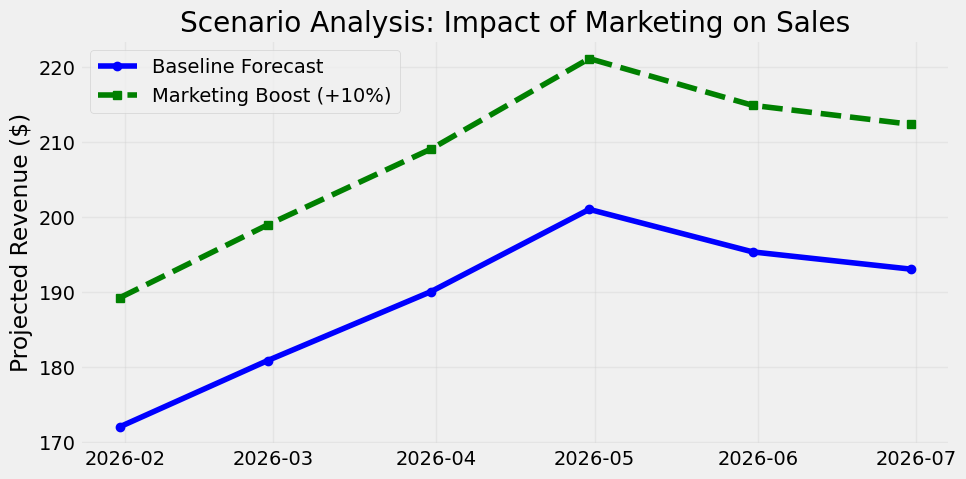

Projected Extra Revenue from Campaign: $113.24


In [ ]:
# 1. Define a 'Growth Scenario' (e.g., a 10% boost due to a marketing campaign)
marketing_boost = 1.10
boosted_forecast = forecast * marketing_boost

# 2. Compare the Baseline vs. The Boosted Scenario
plt.figure(figsize=(10, 5))
plt.plot(forecast.index, forecast, label='Baseline Forecast', color='blue', marker='o')
plt.plot(forecast.index, boosted_forecast, label='Marketing Boost (+10%)', color='green', linestyle='--', marker='s')

plt.title('Scenario Analysis: Impact of Marketing on Sales')
plt.ylabel('Projected Revenue ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Calculate the 'Value Add'
extra_revenue = boosted_forecast.sum() - forecast.sum()
print(f"Projected Extra Revenue from Campaign: ${extra_revenue:.2f}")

> ## 📊 Executive Summary: Sales Performance & 2026 Outlook
>
> **1. Performance Overview**
> * The business has maintained a consistent **upward trend**, with a base growth rate of approximately **$2.00 per month**.
> * Historical data shows strong **seasonality**, with predictable peaks every 12 months.
>
> **2. Forecasted Revenue (Next 6 Months)**
> * **Baseline Projection:** We anticipate a total revenue of **${total_forecasted_sales:.2f}** for the first half of 2026.
> * **Growth Opportunity:** A 10% increase in marketing efficiency could drive an additional **${extra_revenue:.2f}** in revenue.
>
> **3. Data Quality & Anomalies**
> * Identified **{len(outliers)} anomalies** in the historical data. These spikes/dips should be cross-referenced with internal events (e.g., promotions or outages) to refine future models.
>
> **4. Strategic Recommendation**
> * Increase inventory levels 1 month prior to seasonal peaks to avoid stockouts.
> * Investigate the causes of the detected outliers to replicate successes or prevent future losses.

---